<a href="https://colab.research.google.com/github/HebaAhmedDahab/Projects-/blob/main/Bike_Buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Data is about Bikes and who buying it in specific conditions 

In [91]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
#from google.colab import auth
#auth.authenticate_user() 
#import gspread 
#from google.auth import default 
#creds, _ = default() 
#from gspread_dataframe import set_with_dataframe

In [92]:
#reading the csv file
bike_buyers = pd.read_csv("/content/bike_buyers.csv")
bike_buyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


cleaing and processing

In [93]:
bike_buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [94]:
bike_buyers.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [95]:
#Dropping The NaN Values 
bike_buyers = bike_buyers.dropna()
bike_buyers.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [96]:
#Check The Duplicate Values
bike_buyers.duplicated().sum()

0

In [97]:
bike_buyers['Region'].value_counts()

North America    486
Europe           286
Pacific          180
Name: Region, dtype: int64

In [98]:
#Change The Type (int) To Remove The Decimals
bike_buyers['Income'] = bike_buyers['Income'].astype(int)
bike_buyers['Children'] = bike_buyers['Children'].astype(int)
bike_buyers['Cars'] = bike_buyers['Cars'].astype(int)
bike_buyers['Age'] = bike_buyers['Age'].astype(int)
bike_buyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [99]:
#detectin and deleting the outliers 
lower_limit = bike_buyers['Age'].quantile(0.05)   #  28
upper_limit = bike_buyers['Age'].quantile(0.95)   #  65  
bike_buyers_df = bike_buyers[(bike_buyers['Age'] >= lower_limit) & (bike_buyers['Age'] <= upper_limit)]

exploring each region apart


#Europe


In [100]:
europe = bike_buyers[bike_buyers['Region']=='Europe']

<AxesSubplot:xlabel='Gender', ylabel='Count'>

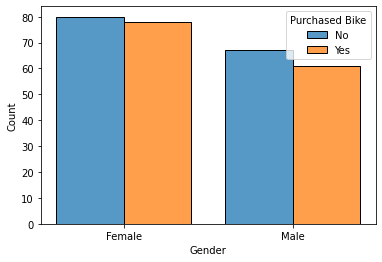

In [101]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=europe ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

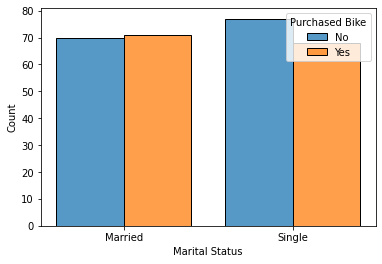

In [102]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Home Owner', ylabel='Count'>

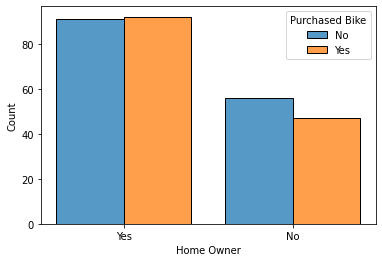

In [103]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Commute Distance', ylabel='Count'>

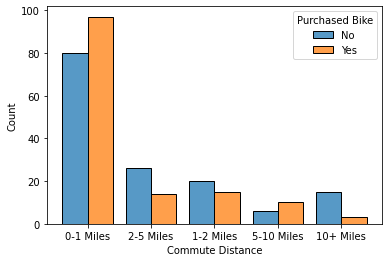

In [104]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Purchased Bike', ylabel='Count'>

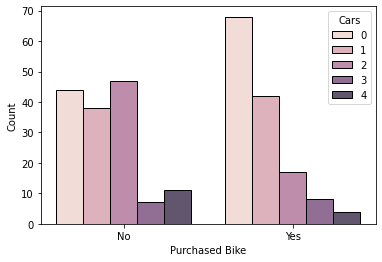

In [105]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=europe, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Count', ylabel='Education'>

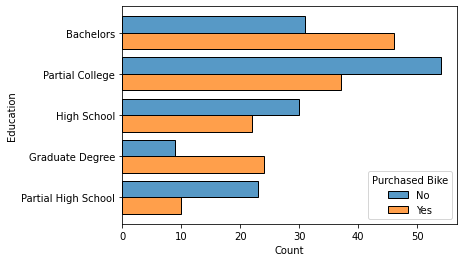

In [106]:
#Purchases according to education
sns.histplot(y="Education", data=europe, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

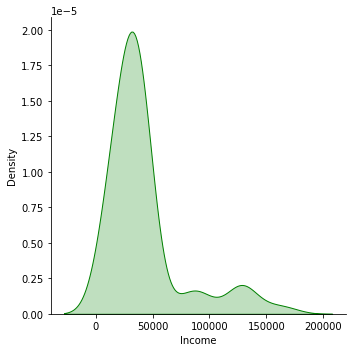

In [107]:
# Showing Bike Purchased People's Income (yes)
europe_yes = europe[europe['Purchased Bike']=='Yes']
yes = europe_yes['Income']
sns.displot(data=europe_yes, x= yes, kind='kde', fill=True, height=5, color='g')

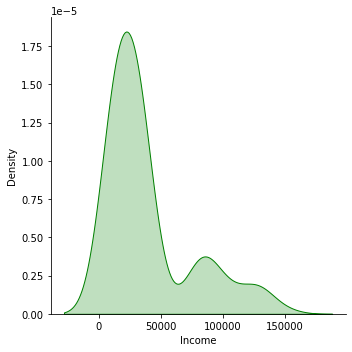

In [108]:
# Showing Bike Purchased People's Income (no)
europe_no = europe[europe['Purchased Bike']=='No']
no = europe_no['Income']
sns.displot(data=europe_no, x= no, kind='kde', fill=True, height=5, color='g')

([<matplotlib.patches.Wedge at 0x7f88c3ec9490>,
 [Text(-0.05270898211804452, 1.1988418424479852, 'Yes'),
  Text(0.048316464051506317, -1.0989383601010385, 'No')],
 [Text(-0.030746906235525968, 0.6993244080946579, '51.4%'),
  Text(0.02635443493718526, -0.5994209236914755, '48.6%')])

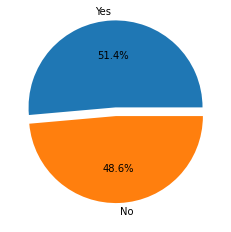

In [109]:
#the perc. of purchased
p = europe['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

#The Pacific

In [110]:
pacific = bike_buyers[bike_buyers['Region']=='Pacific']

<AxesSubplot:xlabel='Gender', ylabel='Count'>

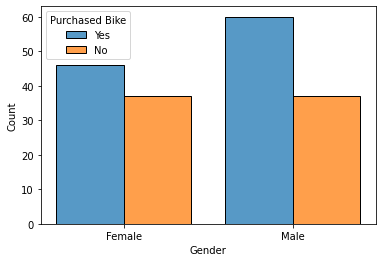

In [111]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=pacific ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

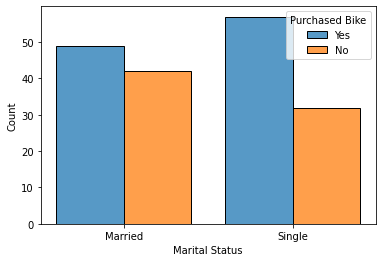

In [112]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Home Owner', ylabel='Count'>

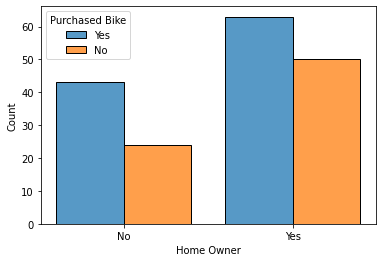

In [113]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Commute Distance', ylabel='Count'>

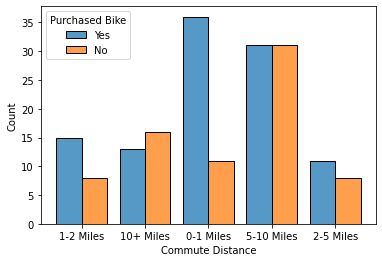

In [114]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Purchased Bike', ylabel='Count'>

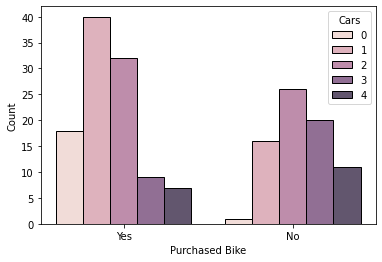

In [115]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=pacific, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Count', ylabel='Education'>

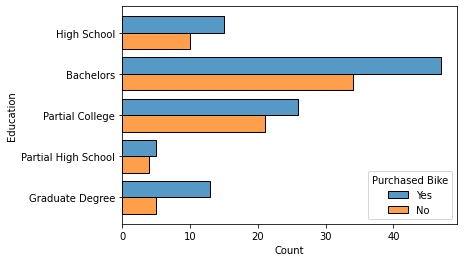

In [116]:
#Purchases according to education
sns.histplot(y="Education", data=pacific, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

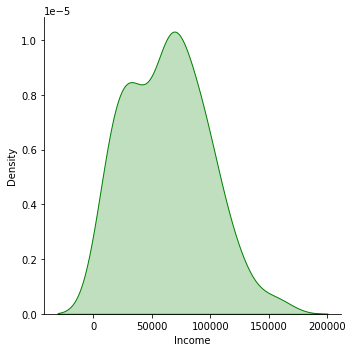

In [117]:
# Showing Bike Purchased People's Income (yes)
pacific_yes = pacific[pacific['Purchased Bike']=='Yes']
yes = pacific_yes['Income']
sns.displot(data=pacific_yes, x= yes, kind='kde', fill=True, height=5, color='g')

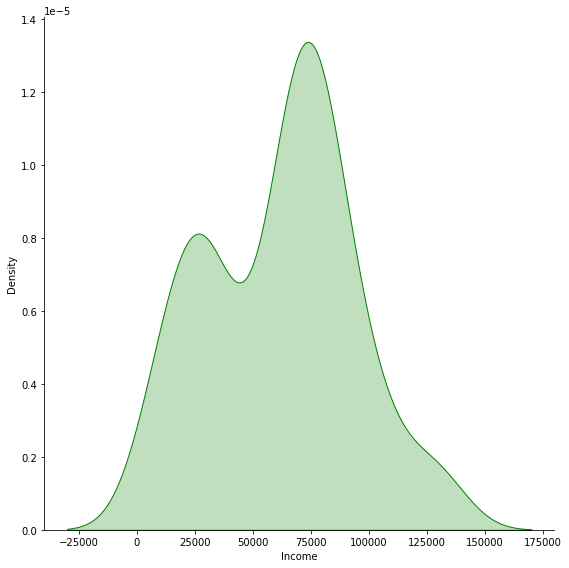

In [118]:
# Showing Bike Purchased People's Income (no)
pacific_no = pacific[pacific['Purchased Bike']=='No']
no = pacific_no['Income']
sns.displot(data=pacific_no, x= no, kind='kde', fill=True, height=8, color='g')

([<matplotlib.patches.Wedge at 0x7f88c39bd5b0>,
 [Text(-0.3307648077804384, 1.1535140406314826, 'Yes'),
  Text(0.30320107379873457, -1.0573878705788593, 'No')],
 [Text(-0.19294613787192239, 0.6728831903683649, '58.9%'),
  Text(0.16538240389021885, -0.5767570203157414, '41.1%')])

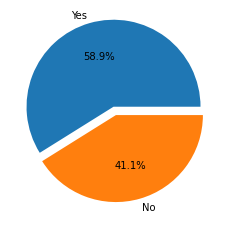

In [119]:
#the perc. of purchased
p = pacific['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

#North America

In [120]:
north_america = bike_buyers[bike_buyers['Region']=='North America']

<AxesSubplot:xlabel='Gender', ylabel='Count'>

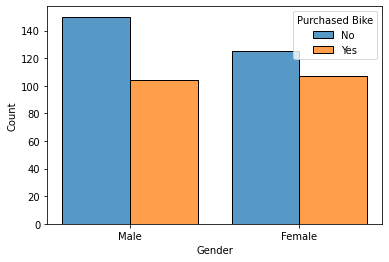

In [121]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=north_america ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

<AxesSubplot:xlabel='Marital Status', ylabel='Count'>

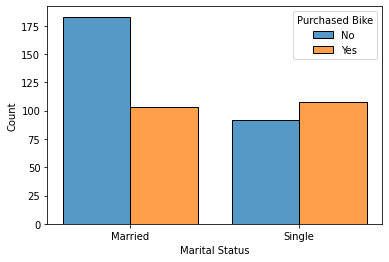

In [122]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Home Owner', ylabel='Count'>

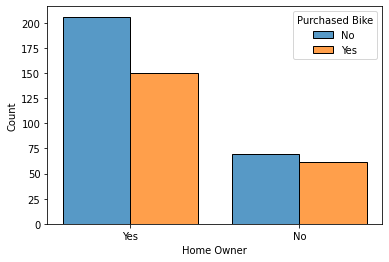

In [123]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Commute Distance', ylabel='Count'>

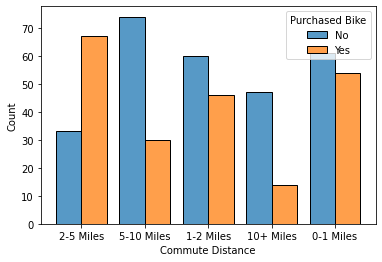

In [124]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Purchased Bike', ylabel='Count'>

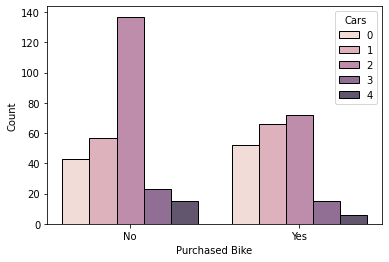

In [125]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=north_america, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

<AxesSubplot:xlabel='Count', ylabel='Education'>

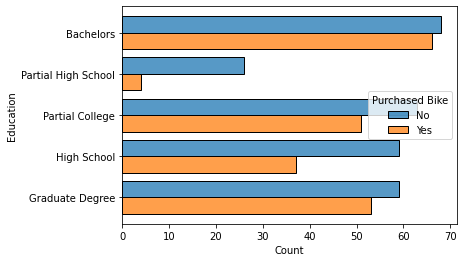

In [126]:
#Purchases according to education
sns.histplot(y="Education", data=north_america, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

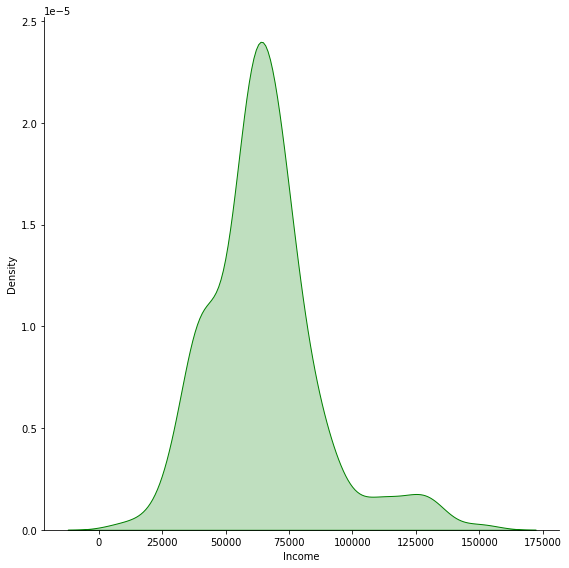

In [127]:
# Showing Bike Purchased People's Income (yes)
north_america_yes = north_america[north_america['Purchased Bike']=='Yes']
yes = north_america_yes['Income']
sns.displot(data=north_america_yes, x= yes, kind='kde', fill=True, height=8, color='g')

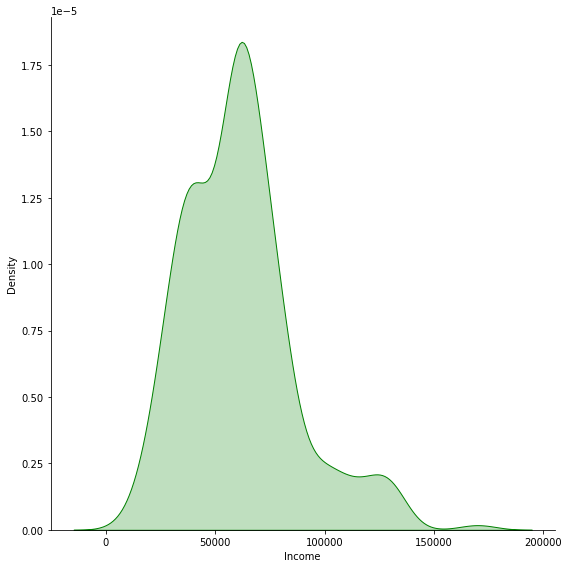

In [128]:
# Showing Bike Purchased People's Income (no)
north_america_no = north_america[north_america['Purchased Bike']=='No']
no = north_america_no['Income']
sns.displot(data=north_america_no, x= no, kind='kde', fill=True, height=8, color='g')

([<matplotlib.patches.Wedge at 0x7f88c34a4370>,
 [Text(-0.24645826968710097, 1.1744182906029863, 'Yes'),
  Text(0.22592018134040223, -1.076550078567235, 'No')],
 [Text(-0.14376732398414221, 0.6850773361850753, '56.6%'),
  Text(0.12322918982203757, -0.5872091337639463, '43.4%')])

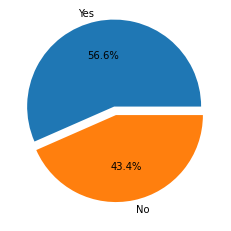

In [129]:
#the perc. of who purchased
p = north_america['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

<AxesSubplot:xlabel='Region', ylabel='Count'>

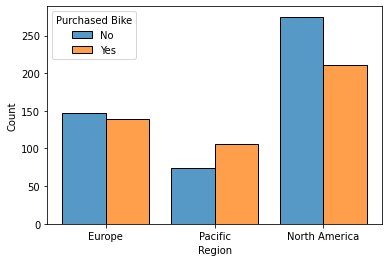

In [130]:
#comparing between the 3 region
sns.histplot(x="Region", data=bike_buyers, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

In [131]:
pacific = bike_buyers[bike_buyers['Region']=='Pacific']
north_america = bike_buyers[bike_buyers['Region']=='North America']

In [132]:
#gc = gspread.authorize(creds)
#sh = gc.create('sales 1000 ') 
#worksheet = gc.open('sales 1000 ').sheet1
#set_with_dataframe(worksheet, sales)

#comparing the 3 region

In [133]:
bike_buyers_df['Purchased Bike'].value_counts()

No     436
Yes    425
Name: Purchased Bike, dtype: int64

In [134]:
bike_buyers['Income'].describe()

count       952.000000
mean      55903.361345
std       30845.483596
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [135]:
bike_buyers_df['Income'].describe()

count       861.000000
mean      57259.001161
std       30718.739882
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

([<matplotlib.patches.Wedge at 0x7f88c33d3fa0>,
 [Text(-0.022073685258235946, 1.0997785015261576, 'NO'),
  Text(0.022073788226930492, -1.099778499459465, 'YES')],
 [Text(-0.012040191959037787, 0.5998791826506313, '50.6 %'),
  Text(0.012040248123780267, -0.5998791815233445, '49.4 %')])

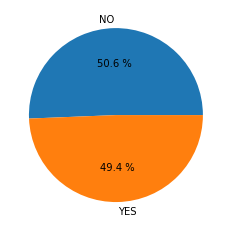

In [136]:
# the perec. of purchased the bike between yes and no
slice = bike_buyers_df['Purchased Bike'].value_counts()
label = 'NO', 'YES'
plt.pie(slice, labels=label, autopct='%.1f %%')

<AxesSubplot:xlabel='Region', ylabel='Count'>

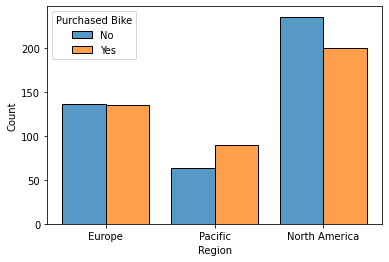

In [137]:
sns.histplot(x="Region", data=bike_buyers_df, hue="Purchased Bike", multiple="dodge", shrink=0.8)

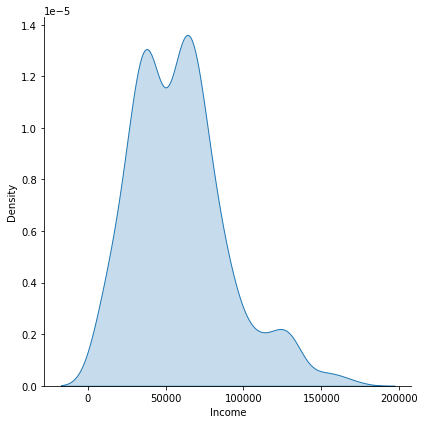

In [138]:
#pulling from the data who purchased the bikes (yes)
yes = bike_buyers_df[bike_buyers_df['Purchased Bike'] == 'Yes']
sns.displot(data= yes, x= 'Income', kind='kde', fill=True, height=6)

# the mean Income for who purchased is = 58870,54
# the range of thier Income  = 40k :70k

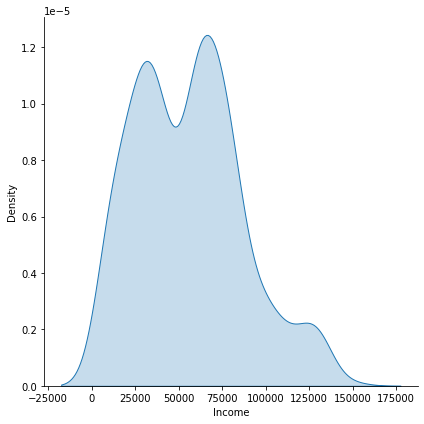

In [139]:
#pulling from the data who purchased the bikes (no)
no = bike_buyers_df[bike_buyers_df['Purchased Bike'] == 'No']
sns.displot(data= no, x= 'Income', kind='kde', fill=True, height=6)

# the mean Income for who purchased is = 55688
# the range of thier Income  = 30k : 72,500

<ipython-input-140-5a29402f291a>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)


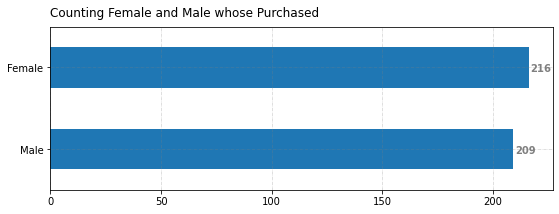

In [140]:
#Purchases according to Gender (yes)

counting = yes['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(9,3))
counting.plot(kind='barh')
for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.3, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.invert_yaxis()
ax.set_title('Counting Female and Male whose Purchased',
             loc='left', pad=10)
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)

<ipython-input-141-a01bfa189f26>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)


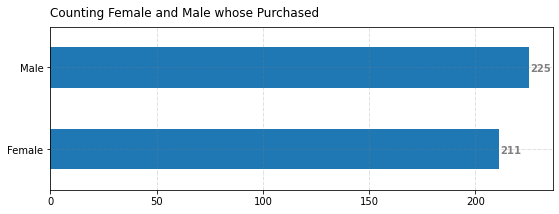

In [141]:
#Purchases according to Gender (no)

counting_ = no['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(9,3))
counting_.plot(kind='barh')
for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.3, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.invert_yaxis()
ax.set_title('Counting Female and Male whose Purchased',
             loc='left', pad=10)
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)